### About Dataset
#### Context
Can you use your regression skills to predict the age of a possum, its head length, whether it is male or female? This classic practice regression dataset comes originally from the DAAG R package (datasets used in examples and exercises in the book Maindonald, J.H. and Braun, W.J. (2003, 2007, 2010) "Data Analysis and Graphics Using R"). This dataset is also used in the OpenIntro Statistics book chapter 8 Introduction to linear regression.

#### Content
From the DAAG R package: "The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland."

#### Acknowledgements
Data originally found in the DAAG R package and used in the book Maindonald, J.H. and Braun, W.J. (2003, 2007, 2010) "Data Analysis and Graphics Using R").

A subset of the data was also put together for the OpenIntro Statistics book chapter 8 Introduction to linear regression.

#### Original Source of dataset:
Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. Morphological variation among columns of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Australian Journal of Zoology 43: 449-458.

#### Inspiration
Get your feet wet with regression techniques here on Kaggle by using this dataset. Perfect for beginners since the OpenIntro Statistics book does a good explanation in Chapter 8.

* Can we use total length to predict a possum's head length?
* Which possum body dimensions are most correlated with age and sex?
* Can we classify a possum's sex by its body dimensions and location?
* Can we predict a possum's trapping location from its body dimensions?

* Predictive Modeling: You’re expected to use regression analysis to predict the age, head length, and sex of a possum.* 
Dataset Details: The dataset comes from the DAAG R package and contains nine morphometric measurements for each of 104 mountain brushtail possums, captured across seven locations from Southern Victoria to central Queensland.* 
Educational Purpose: This dataset is commonly used for educational purposes, such as in the OpenIntro Statistics book, particularly in the chapter on linear regression* .
Research Source: The original research was conducted by Lindenmayer et al. (1995), focusing on morphological variation among populations of the mountain brushtail poss

#### m.
For the challenge, you might consider the following tak* s:

Use total length to predict a possum’s head le* ngth.
Determine which body dimensions correlate most with age an* d sex.
Classify a possum’s sex based on body dimensions and lo* cation.
Predict a possum’s trapping location from its body dimchallenge!

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


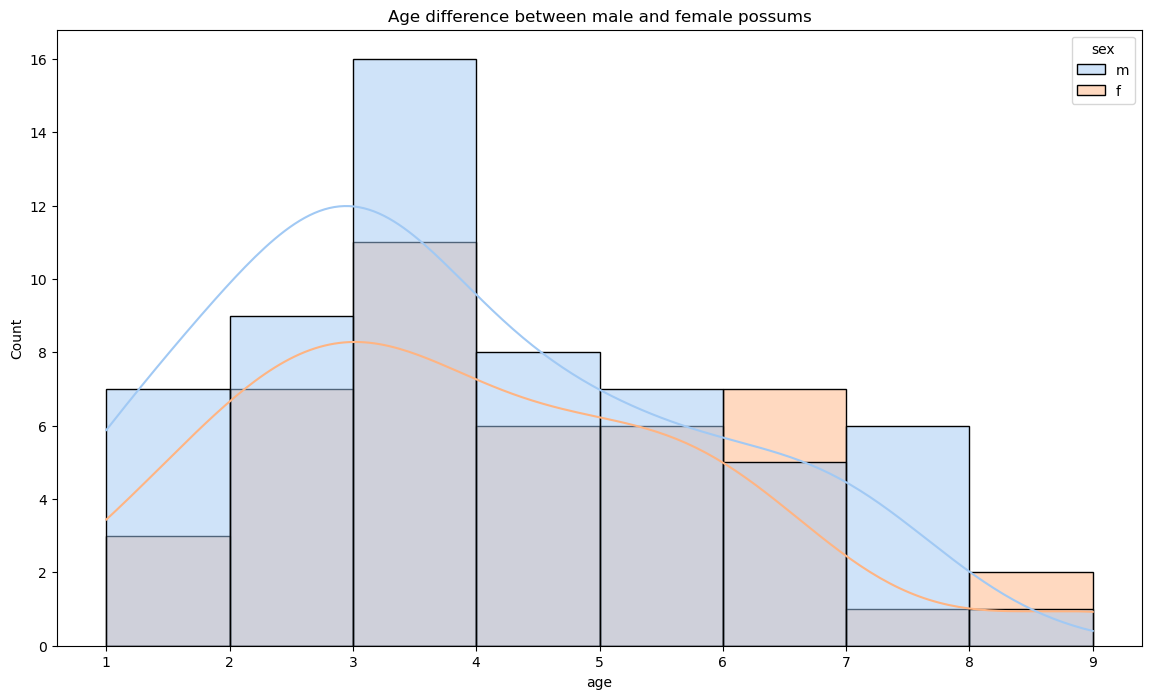

In [3]:
plt.figure(figsize=(14, 8))
plt.title("Age difference between male and female possums")
sns.histplot(x=df.age, hue=df.sex, palette="pastel", kde=True);

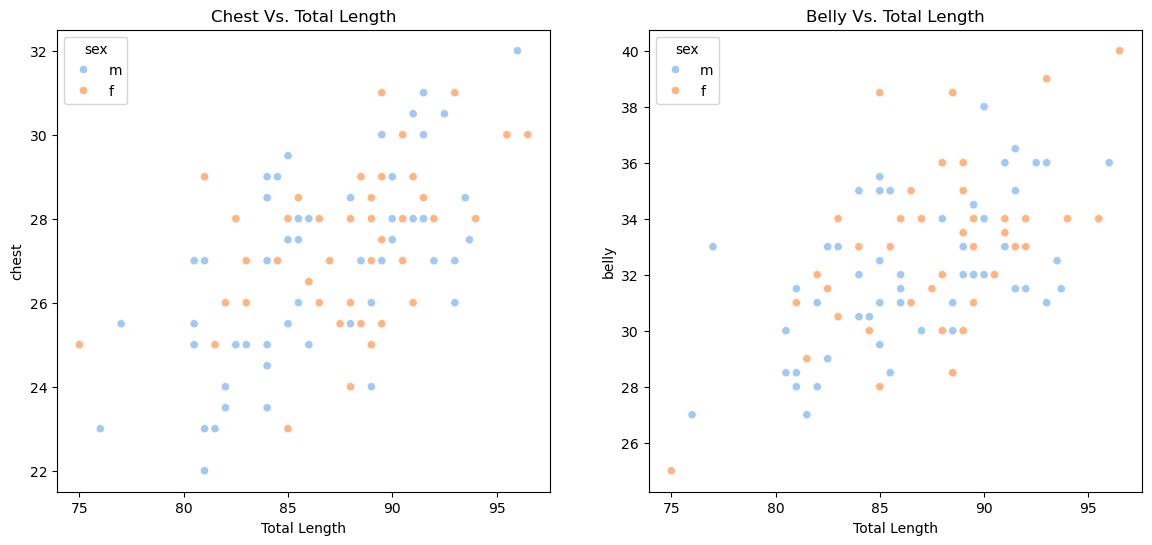

In [8]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax1.set_title("Chest Vs. Total Length")
ax2.set_title("Belly Vs. Total Length")
sns.scatterplot(data=df, x="totlngth", y="chest", hue="sex", palette="pastel", ax=ax1)
ax1.set_xlabel("Total Length")
sns.scatterplot(data=df, x="totlngth", y="belly", hue="sex", palette="pastel", ax=ax2)
ax2.set_xlabel("Total Length");

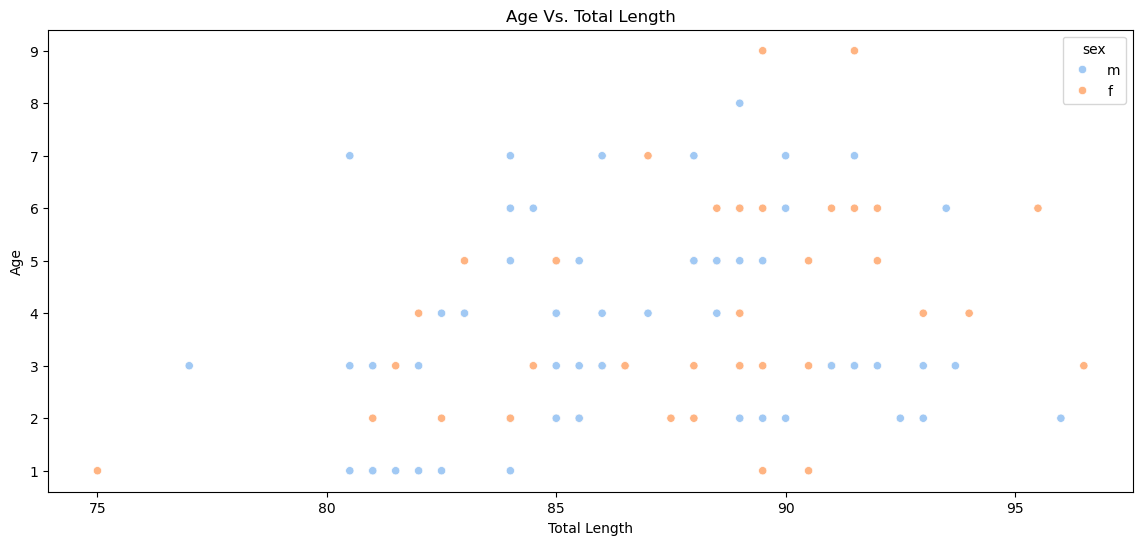

In [14]:
plt.figure(figsize=(14, 6))
plt.title("Age Vs. Total Length")
sns.scatterplot(data=df, x="totlngth", y="age", hue="sex", palette="pastel")
plt.xlabel("Total Length")
plt.ylabel("Age");

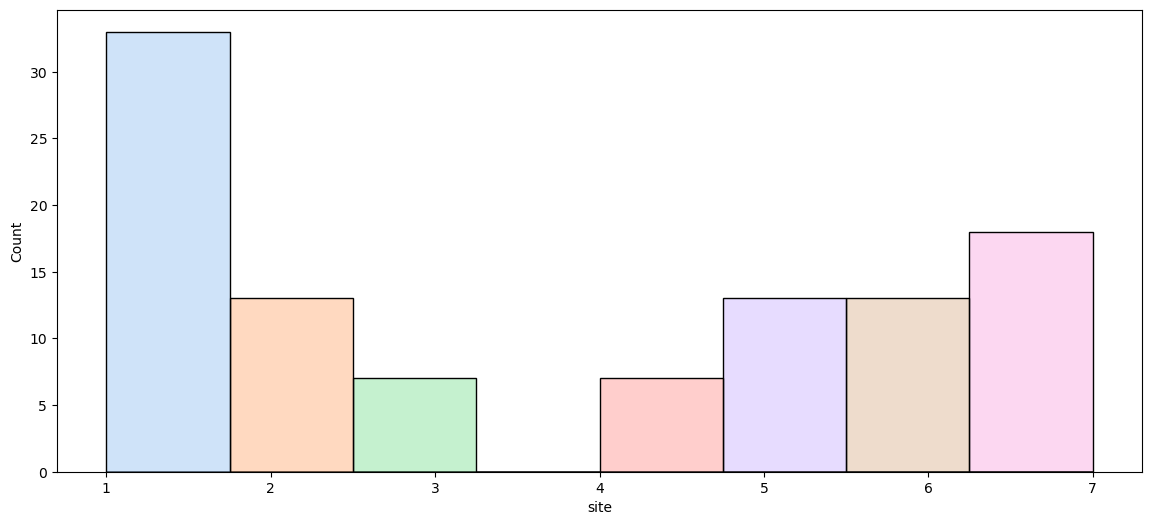

In [6]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="site", palette="pastel", hue="site", legend=False);

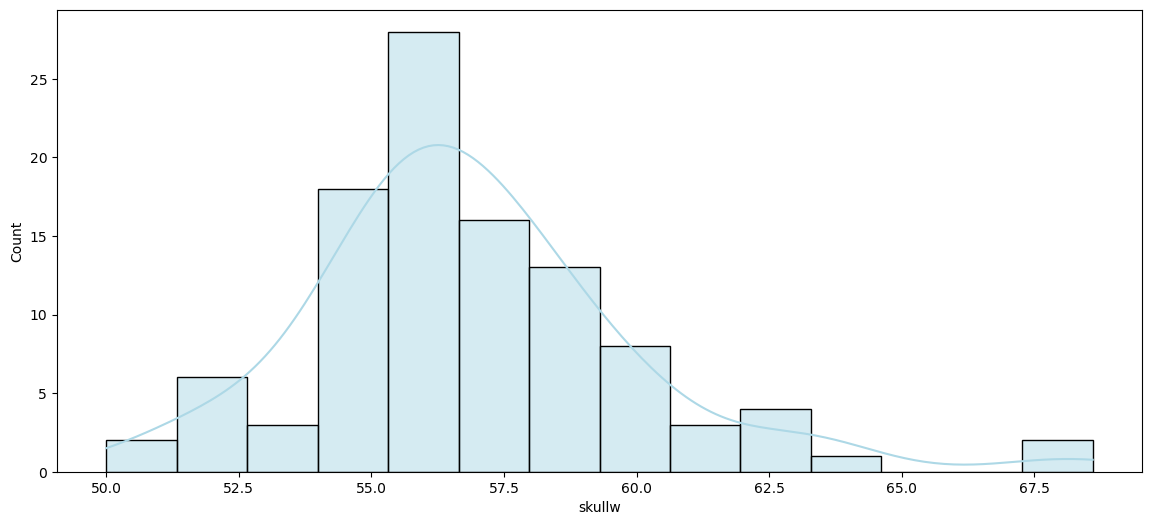

In [7]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="skullw", kde=True, color="lightblue");

In [16]:
encoder = LabelEncoder()

def preprocess(df):
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = encoder.fit_transform(content)

    return df

temp_df = preprocess(df)

* Which possum body dimensions are most correlated with age and sex?


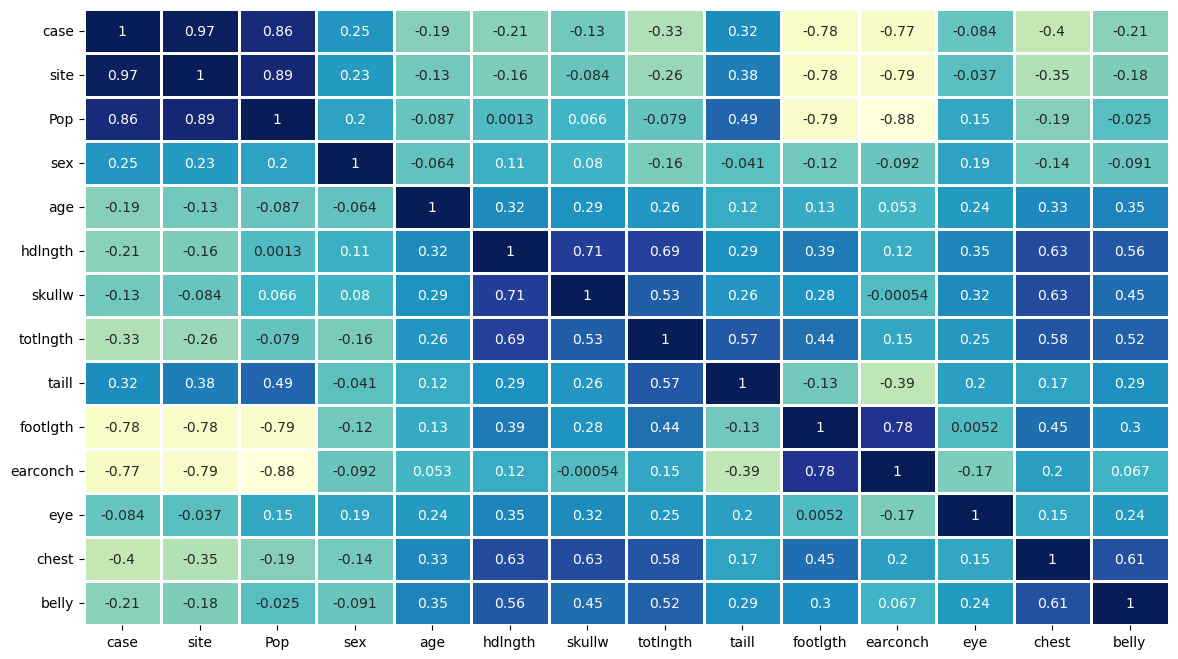

In [17]:
plt.figure(figsize=(14, 8))
sns.heatmap(temp_df.corr(), annot=True, linewidths=0.9, cmap="YlGnBu", cbar=False);

* Can we use total length to predict a possum's head length?